# Datasets Analysis
This notebook analyzes the issues of each dataset by visualizing the number of words in their titles and bodies.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
import contractions
from tqdm import tqdm


sns.set_theme()

%matplotlib inline

In [3]:
# Define a function to process each dataframe
def process_dataframe(df):
    """
    Process the dataframe by filtering, applying contractions and stopwords removal,
    and calculating the number of words in the body and title.
    
    Parameters:
    df (pd.DataFrame): The dataframe to process.
    
    Returns:
    pd.DataFrame: The processed dataframe.
    """
    # Filter the dataframe to include only rows with label 0 or 1
    df = df[(df['label'] == 0) | (df['label'] == 1)]
    
    # Apply contractions fix to the body and title columns
    df['body'] = df['body'].astype('str').apply(contractions.fix)
    df['title'] = df['title'].astype('str').apply(contractions.fix)
    
    # Remove stopwords from the body and title columns
    df['body'] = df['body'].astype('str').apply(remove_stopwords)
    df['title'] = df['title'].astype('str').apply(remove_stopwords)
    
    # Calculate the number of words in the body and title
    df['number_of_words_of_body'] = df['body'].str.split().str.len()
    df['number_of_words_of_title'] = df['title'].str.split().str.len()
    
    return df

In [5]:
# Load the data from CSV files
# Replace 'jira_samples_0.csv', 'jira_samples_1.csv', 'jira_samples_2.csv', and 'samples.csv' with the correct file paths
df1 = pd.read_csv('datasets/jira_samples_0.csv')
df2 = pd.read_csv('datasets/jira_samples_1.csv')
df3 = pd.read_csv('datasets/jira_samples_2.csv')
df4 = pd.read_csv('datasets/samples.csv')

# Add the contraction fix for a specific token
contractions.add('__label__', 'REMOVED_TOKEN')

# Process the dataframes using the defined function
df1 = process_dataframe(df1)
df2 = process_dataframe(df2)
df3 = process_dataframe(df3)
df4 = process_dataframe(df4)

C:\Users\hlias\AppData\Local\Temp\ipykernel_43868\203689717.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].astype('str').apply(contractions.fix)
C:\Users\hlias\AppData\Local\Temp\ipykernel_43868\203689717.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].astype('str').apply(contractions.fix)
C:\Users\hlias\AppData\Local\Temp\ipykernel_43868\203689717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [6]:
def generate_plots(df, dataset_name, threshold_title=12, threshold_body=150, ylim0=160000, ylim1=85000, binwidth=4):
    """
    Generate and save histograms for the number of words in the title and body.
    
    Parameters:
    df (pd.DataFrame): The dataframe to plot.
    dataset_name (str): The name of the dataset.
    threshold_title (int): The threshold for the number of words in the title.
    threshold_body (int): The threshold for the number of words in the body.
    """
    
    # Create subplots with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(12)
    fig.suptitle(dataset_name, fontsize=20)
    
    # Set labels for the x and y axes of the first subplot
    ax[0].set_xlabel('number of words of summary')
    ax[0].set_ylabel('number of issues')
    ax[0].set_ylim(0, ylim0)


    # Set labels for the x and y axes of the second subplot
    ax[1].set_xlabel('number of words of description')
    ax[1].set_ylabel('number of issues')
    ax[1].set_ylim(0, ylim1)

    # Plot histogram of number of words in the title, filtered by threshold
    sns.histplot(data=df[df['number_of_words_of_title'] < threshold_title], x='number_of_words_of_title', kde=False, stat='count', binwidth=1, ax=ax[0])
    # Plot histogram of number of words in the body, filtered by threshold
    sns.histplot(data=df[df['number_of_words_of_body'] < threshold_body], x='number_of_words_of_body', kde=False, stat='count', binwidth=binwidth, ax=ax[1])

    plt.show()
    fig.savefig(f'figures/{dataset_name.lower()}_title_words_less_than_{threshold_title}_body_words_less_than_{threshold_body}.pdf', dpi=500)


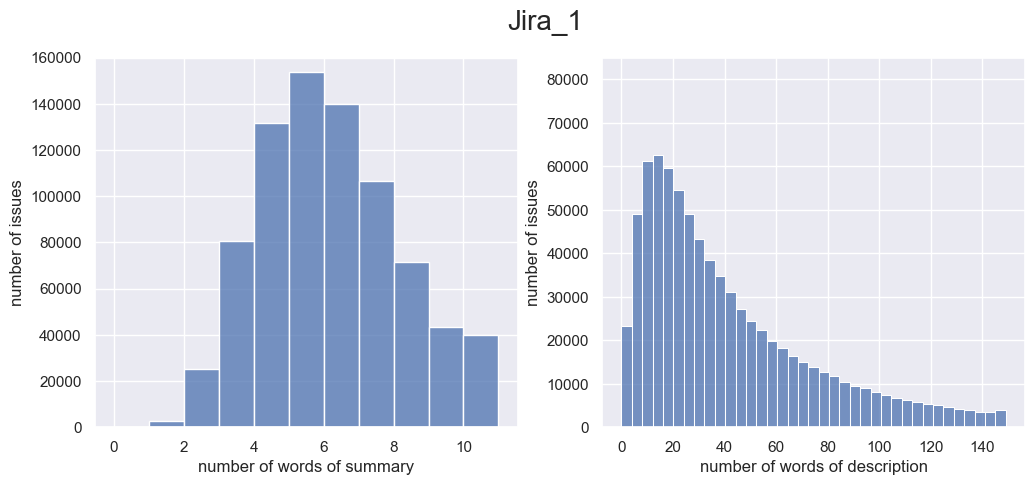

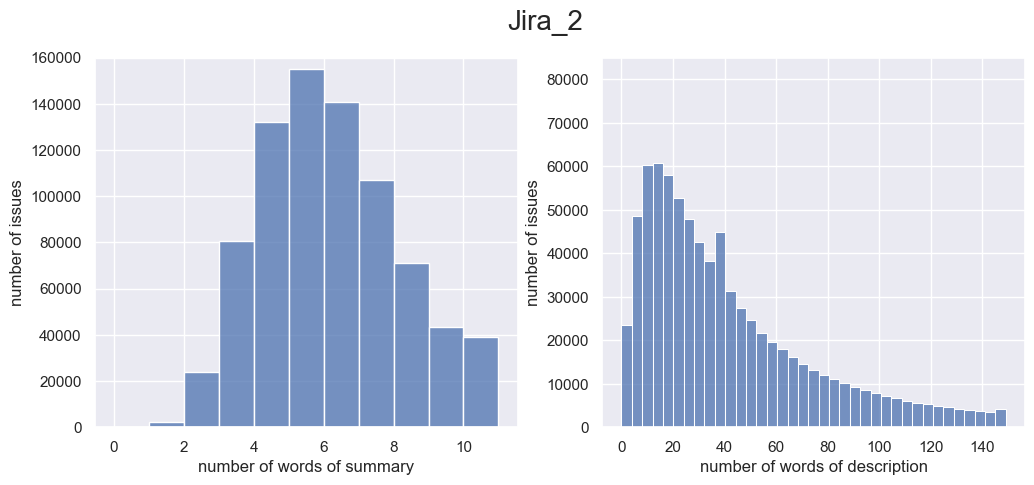

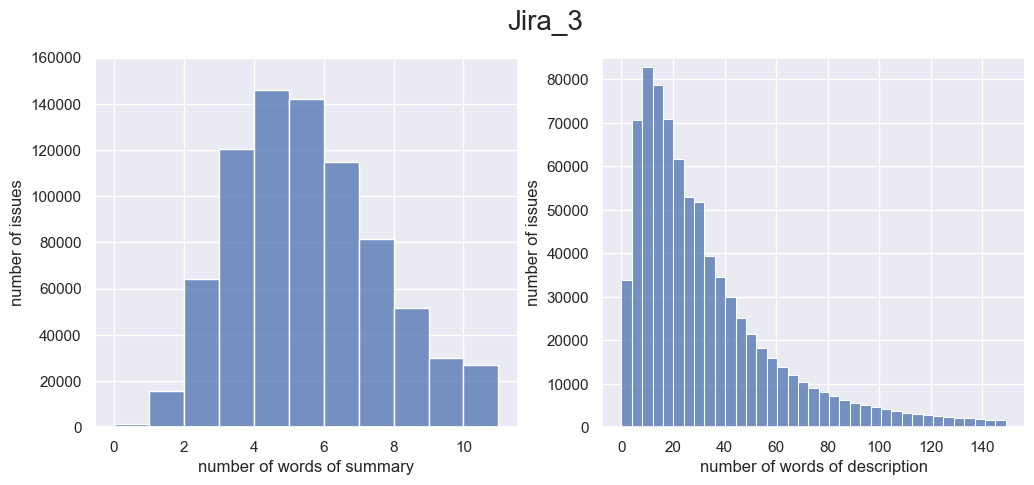

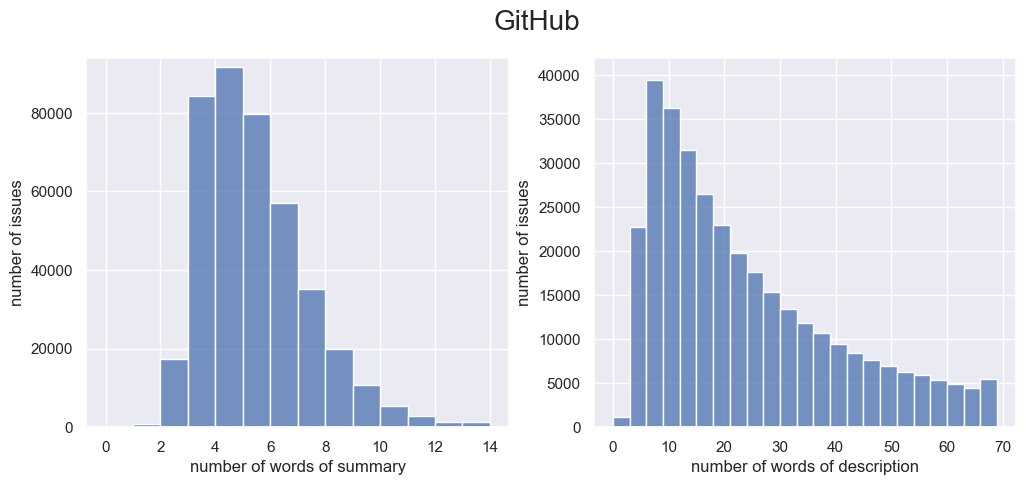

In [9]:
# Generate and save the plots for each dataframe
generate_plots(df1, 'Jira_1', threshold_title=12, threshold_body=150, ylim0=160000, ylim1=85000, binwidth=4)
generate_plots(df2, 'Jira_2', threshold_title=12, threshold_body=150, ylim0=160000, ylim1=85000, binwidth=4)
generate_plots(df3, 'Jira_3', threshold_title=12, threshold_body=150, ylim0=160000, ylim1=85000, binwidth=4)
generate_plots(df4, 'GitHub', threshold_title=15, threshold_body=70, ylim0=94000, ylim1=42000, binwidth=3)